In [ ]:
# Para la Estrategia 2. Este es el modelo 4 de regresión para vehículos premium >= 70.000 euros

In [1]:
# Paso 1: Importar las bibliotecas necesarias

import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Paso 2: Carga de datos

df = pd.read_csv("../data/feature_engineering.csv")

# df70 = df[df["price"] >= 70000]

In [ ]:
# df70

,year,kms,power,price,make_Abarth,make_Alfa Romeo,make_Alpine,make_Aston Martin,make_Audi,make_BMW,...,segmento_A,segmento_B,segmento_C,segmento_D,segmento_E,segmento_F,segmento_J,segmento_M,segmento_S,segmento_otros
37,2020,30000.0,435.0,107990,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
52,2017,29900.0,476.0,129900,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
95,1999,78000.0,400.0,70900,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
99,2021,51900.0,476.0,116900,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
127,2008,8700.0,850.0,199000,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8882,2020,18708.0,408.0,73990,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
8895,2019,31900.0,340.0,78900,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
8918,1997,214000.0,272.0,70000,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8931,2019,88900.0,816.0,79900,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [55]:
# Separar características y target antes del split
X = df.drop(columns="price")
y = df["price"]

In [56]:
# División
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Unir temporalmente para filtrar de forma coherente
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

# Filtro por precio < 70000 en cada conjunto
train = train[train["price"] >= 70000]
test = test[test["price"] >= 70000]

# Volver a separar
X_train = train.drop(columns="price")
y_train = train["price"]

X_test = test.drop(columns="price")
y_test = test["price"]

# Aplicar logaritmo natural + 1
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [57]:
# df70

In [58]:
# sns.histplot(df70["price"], kde=True, color="skyblue")
# plt.title(f'Histograma para {"Price"}')
# plt.xlabel("Price")
# plt.ylabel('Frecuencia')

# plt.tight_layout()  # Ajustar el diseño
# plt.show()

In [59]:
# # Transformación logarítmica

# # Aplica la transformación logarítmica
# cols_to_transform = ['price']
# df70[cols_to_transform] = df70[cols_to_transform].apply(np.log1p)

In [60]:
# df70

In [61]:
# sns.histplot(df70["price"], kde=True, color="skyblue")
# plt.title(f'Histograma para {"Price"}')
# plt.xlabel("Price")
# plt.ylabel('Frecuencia')

# plt.tight_layout()  # Ajustar el diseño
# plt.show()

In [62]:
# # Separar características (X) y variable objetivo (y)
# X = df70.drop(columns="price")
# y_log = df70["price"]

# # Dividir en conjunto de entrenamiento y prueba
# X_train, X_test, y_train_log, y_test_log = train_test_split(
#     X, y_log, test_size=0.2, random_state=42
# )

XGBRegressor

In [63]:
# Definir modelo base
xgb_model = XGBRegressor(random_state=42)

# Hiperparámetros para GridSearch
param_grid = {
    "max_depth": [1,2,3],
    "n_estimators": [5,10,20],
    "learning_rate": [0.05,0.1,0.2]
}

# Grid search con validación cruzada
xgb_grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)

# Entrenar modelo
xgb_grid_search.fit(X_train, y_train_log)

# Mejor modelo encontrado
best_xgb= xgb_grid_search.best_estimator_

# Predicciones
y_train_log_pred = best_xgb.predict(X_train)
y_test_log_pred = best_xgb.predict(X_test)

# Revertir la transformación logarítmica para evaluar en la escala original

y_train_pred = np.expm1(y_train_log_pred)
y_test_pred = np.expm1(y_test_log_pred)
y_train = np.expm1(y_train_log)
y_test = np.expm1(y_test_log)

# Métricas de evaluación en la escala original
mae_train_xgb = mean_absolute_error(y_train, y_train_pred)
mae_test_xgb = mean_absolute_error(y_test, y_test_pred)

# R² (en la escala original)
r2_train_xgb = r2_score(y_train, y_train_pred)
r2_test_xgb = r2_score(y_test, y_test_pred)

# Resultados
print("=== Evaluación del mejor modelo XGBoost ===")
print(f"Mejores hiperparámetros: {xgb_grid_search.best_params_}")
print(f"MAE en entrenamiento: {mae_train_xgb:.4f}")
print(f"MAE en prueba:        {mae_test_xgb:.4f}")
print(f"R² en entrenamiento: {r2_train_xgb:.4f}")
print(f"R² en prueba:        {r2_test_xgb:.4f}")


=== Evaluación del mejor modelo XGBoost ===
Mejores hiperparámetros: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 20}
MAE en entrenamiento: 15467.7637
MAE en prueba:        20509.0264
R² en entrenamiento: 0.8612
R² en prueba:        0.7305


Random Forest

In [64]:

# Definir el modelo base
rf_model = RandomForestRegressor(random_state=42)

# Espacio de búsqueda de hiperparámetros
param_grid = {
    "n_estimators": [50,75, 100],
    "max_depth": [9,10,12],
    # Puedes añadir más parámetros si los deseas:
    # "max_features": [8, 9, 10],
    # "max_leaf_nodes": [70, 100, 140]
}

# Configurar búsqueda en cuadrícula con validación cruzada
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)

# Entrenar el modelo con el conjunto de entrenamiento
grid_search_rf.fit(X_train, y_train_log)

# Mejor modelo encontrado
best_rf = grid_search_rf.best_estimator_

# Predicciones
y_train_log_pred = best_rf.predict(X_train)
y_test_log_pred = best_rf.predict(X_test)

# Revertir la transformación logarítmica para evaluar en la escala original

y_train_pred = np.expm1(y_train_log_pred)
y_test_pred = np.expm1(y_test_log_pred)
y_train = np.expm1(y_train_log)
y_test = np.expm1(y_test_log)


# Evaluación con MAE
mae_train_rf = mean_absolute_error(y_train, y_train_pred)
mae_test_rf = mean_absolute_error(y_test, y_test_pred)

# R² (en la escala original)
r2_train_rf = r2_score(y_train, y_train_pred)
r2_test_rf = r2_score(y_test, y_test_pred)

# Resultados
print("=== Evaluación del mejor modelo Random Forest ===")
print(f"Mejores hiperparámetros: {grid_search_rf.best_params_}")
print(f"MAE en entrenamiento: {mae_train_rf:.4f}")
print(f"MAE en prueba:        {mae_test_rf:.4f}")
print(f"R² en entrenamiento: {r2_train_rf:.4f}")
print(f"R² en prueba:        {r2_test_rf:.4f}")

=== Evaluación del mejor modelo Random Forest ===
Mejores hiperparámetros: {'max_depth': 10, 'n_estimators': 75}
MAE en entrenamiento: 7854.1350
MAE en prueba:        15733.3249
R² en entrenamiento: 0.9576
R² en prueba:        0.8405


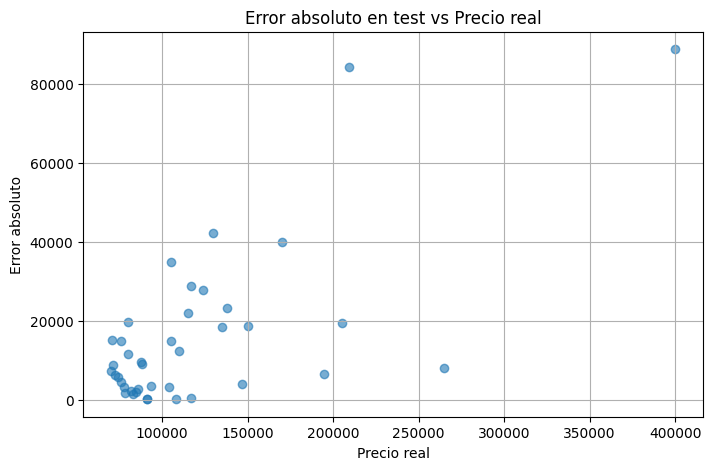

In [65]:
# Error absoluto por muestra
errors_abs = np.abs(y_test - y_test_pred)

plt.figure(figsize=(8,5))
plt.scatter(y_test, errors_abs, alpha=0.6)
plt.xlabel('Precio real')
plt.ylabel('Error absoluto')
plt.title('Error absoluto en test vs Precio real')
# plt.ylim(0, 100000)  # Limitar eje Y
plt.grid(True)
plt.show()

In [66]:
# Definir el modelo base
cat_model = CatBoostRegressor(random_state=42, verbose=0)

# Espacio de búsqueda de hiperparámetros
param_grid = {
    "depth": [2,4, 6],
    "learning_rate": [0.05, 0.1, 0.2],
    "iterations": [50,75,100]
}

# Configurar búsqueda en cuadrícula con validación cruzada
grid_search_cat = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)

# Entrenar el modelo con el conjunto de entrenamiento
grid_search_cat.fit(X_train, y_train_log)

# Mejor modelo encontrado
best_cat = grid_search_cat.best_estimator_

# Predicciones
y_train_log_pred = best_cat.predict(X_train)
y_test_log_pred = best_cat.predict(X_test)

# Revertir la transformación logarítmica para evaluar en la escala original

y_train_pred = np.expm1(y_train_log_pred)
y_test_pred = np.expm1(y_test_log_pred)
y_train = np.expm1(y_train_log)
y_test = np.expm1(y_test_log)

# Evaluación con MAE
mae_train_cat = mean_absolute_error(y_train, y_train_pred)
mae_test_cat = mean_absolute_error(y_test, y_test_pred)

# Evaluación con R²
r2_train_cat = r2_score(y_train, y_train_pred)
r2_test_cat = r2_score(y_test, y_test_pred)

# Resultados
print("=== Evaluación del mejor modelo CatBoost ===")
print(f"Mejores hiperparámetros: {grid_search_cat.best_params_}")
print(f"MAE en entrenamiento: {mae_train_cat:.4f}")
print(f"MAE en prueba:        {mae_test_cat:.4f}")
print(f"R² en entrenamiento: {r2_train_cat:.4f}")
print(f"R² en prueba:        {r2_test_cat:.4f}")

=== Evaluación del mejor modelo CatBoost ===
Mejores hiperparámetros: {'depth': 6, 'iterations': 100, 'learning_rate': 0.2}
MAE en entrenamiento: 6214.4563
MAE en prueba:        17785.0908
R² en entrenamiento: 0.9816
R² en prueba:        0.8251


In [67]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Definir el modelo base
gb_model = GradientBoostingRegressor(random_state=42)

# Espacio de búsqueda de hiperparámetros
param_grid = {
    "n_estimators": [50, 70, 80],
    "max_depth": [3,4, 5],
    "learning_rate": [0.05, 0.1, 0.2]
}

# Configurar búsqueda en cuadrícula con validación cruzada
grid_search_gb = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)

# Entrenar el modelo con el conjunto de entrenamiento
grid_search_gb.fit(X_train, y_train_log)

# Mejor modelo encontrado
best_gb = grid_search_gb.best_estimator_

# Predicciones
y_train_log_pred = best_gb.predict(X_train)
y_test_log_pred = best_gb.predict(X_test)

# Revertir la transformación logarítmica para evaluar en la escala original

y_train_pred = np.expm1(y_train_log_pred)
y_test_pred = np.expm1(y_test_log_pred)
y_train = np.expm1(y_train_log)
y_test = np.expm1(y_test_log)

# Evaluación con MAE
mae_train_gb = mean_absolute_error(y_train, y_train_pred)
mae_test_gb = mean_absolute_error(y_test, y_test_pred)

# Evaluación con R²
r2_train_gb = r2_score(y_train, y_train_pred)
r2_test_gb = r2_score(y_test, y_test_pred)

# Resultados
print("=== Evaluación del mejor modelo Gradient Boosting ===")
print(f"Mejores hiperparámetros: {grid_search_gb.best_params_}")
print(f"MAE en entrenamiento: {mae_train_gb:.4f}")
print(f"MAE en prueba:        {mae_test_gb:.4f}")
print(f"R² en entrenamiento: {r2_train_gb:.4f}")
print(f"R² en prueba:        {r2_test_gb:.4f}")

=== Evaluación del mejor modelo Gradient Boosting ===
Mejores hiperparámetros: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 80}
MAE en entrenamiento: 6811.4710
MAE en prueba:        15825.7843
R² en entrenamiento: 0.9787
R² en prueba:        0.8351


In [68]:
# Crear tabla con los resultados
resultados_modelos = pd.DataFrame({
    "Modelo": ["Random Forest", "XGBoost", "CatBoost", "Gradient Boosting"],
    "MAE Train": [mae_train_rf, mae_train_xgb, mae_train_cat, mae_train_gb],
    "MAE Test": [mae_test_rf, mae_test_xgb, mae_test_cat, mae_test_gb],
    "R² Train": [r2_train_rf, r2_train_xgb, r2_train_cat, r2_train_gb],
    "R² Test": [r2_test_rf, r2_test_xgb, r2_test_cat, r2_test_gb]
})

# Mostrar tabla ordenada por mejor MAE en test
resultados_modelos = resultados_modelos.sort_values(by="MAE Test", ascending=True)

# Visualizar
print(resultados_modelos)

              Modelo     MAE Train      MAE Test  R² Train   R² Test
0      Random Forest   7854.135014  15733.324927  0.957621  0.840460
3  Gradient Boosting   6811.470982  15825.784304  0.978676  0.835084
2           CatBoost   6214.456312  17785.090776  0.981565  0.825058
1            XGBoost  15467.763744  20509.026367  0.861240  0.730477


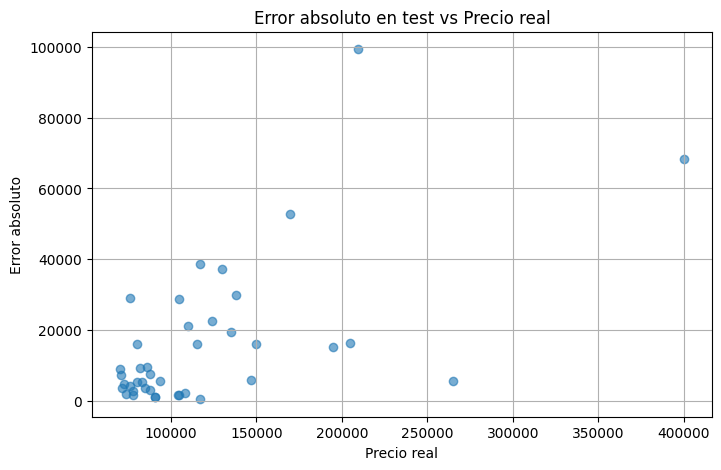

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Error absoluto por muestra
errors_abs = np.abs(y_test - y_test_pred)

plt.figure(figsize=(8,5))
plt.scatter(y_test, errors_abs, alpha=0.6)
plt.xlabel('Precio real')
plt.ylabel('Error absoluto')
plt.title('Error absoluto en test vs Precio real')
# plt.ylim(0, 100000)  # Limitar eje Y
plt.grid(True)
plt.show()

In [70]:
# Vamos a guardar un modelo

from joblib import dump

# Guardamos el mejor modelo para los vehículos de más de 70000 euros, los calificaremos premium. En este caso Random Forest. Se ha trabajado con transformada logarítmica en target precio
dump(best_rf, "../model/Modelo4_regresion_rf_logY_split.pkl")
print("✅ Modelo de Random Forest con transformación logaritmica en target 'Modelo4_regresion_rf_logY.pkl'")


✅ Modelo de Random Forest con transformación logaritmica en target 'Modelo4_regresion_rf_logY.pkl'
